In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
train = pd.read_csv('loan_train.csv')
test = pd.read_csv('loan_test.csv')

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.info()
train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


(614, 13)

In [6]:
train.drop('Loan_ID', axis=1, inplace=True)
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
train.duplicated().sum()

0

In [8]:
train = train.fillna(train.mean())
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [9]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
train = train.dropna()

In [11]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,554.000000,554.000000,554.000000,554.000000,554.000000
mean,5267.059567,1585.575668,144.969009,341.956679,0.843348
std,5455.163295,2524.484889,81.078416,64.727653,0.349310
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2843.750000,0.000000,100.000000,360.000000,1.000000
50%,3839.500000,1149.000000,128.000000,360.000000,1.000000
75%,5818.750000,2297.250000,166.750000,360.000000,1.000000
max,81000.000000,33837.000000,650.000000,480.000000,1.000000


In [13]:
test.head()
test.info()
test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


(367, 12)

In [14]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [15]:
test.drop('Loan_ID', axis=1, inplace=True)

In [16]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [17]:
test = test.fillna(train.mean())
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.843348,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.000000,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.000000,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,0.843348,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.000000,Rural


In [18]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [19]:
test = test.dropna()

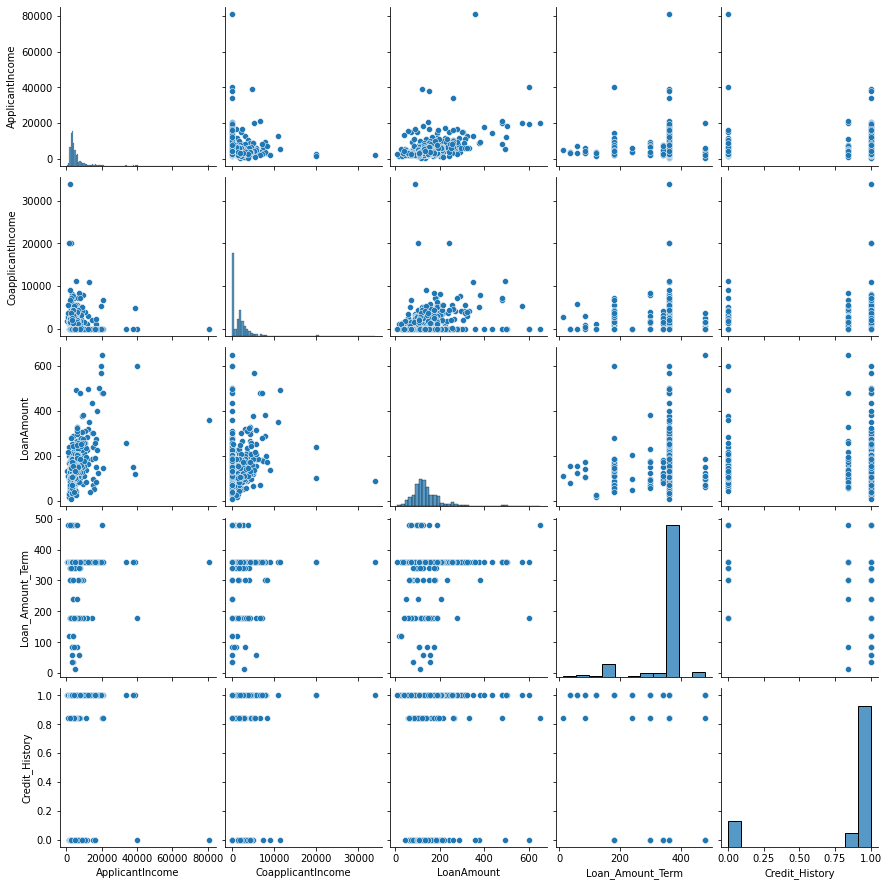

In [20]:
sns.pairplot(train)
plt.show()

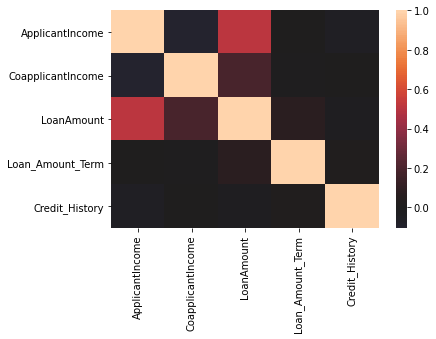

In [21]:
sns.heatmap(train.corr(), center=0, robust=True)
plt.show()

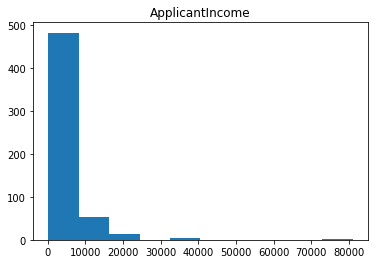

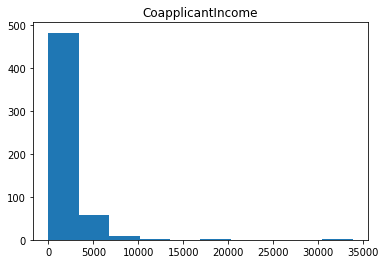

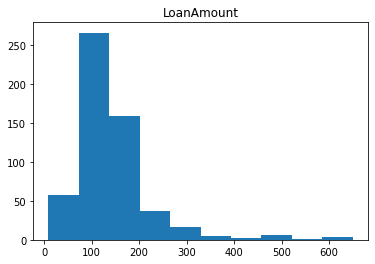

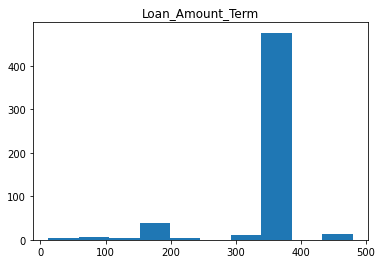

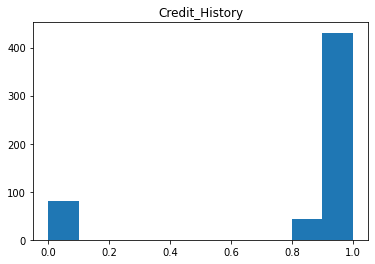

In [22]:
num = train.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = train.select_dtypes('object').columns.to_list()

#numeric df
loan_num =  train[num]
#categoric df
loan_cat = train[cat]

for i in loan_num:
    plt.hist(loan_num[i])
    plt.title(i)
    plt.show()

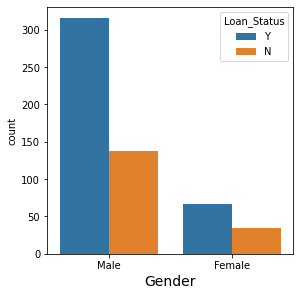

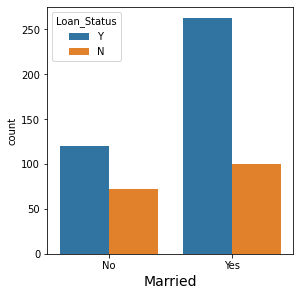

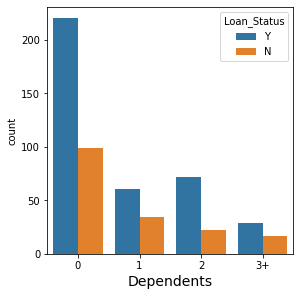

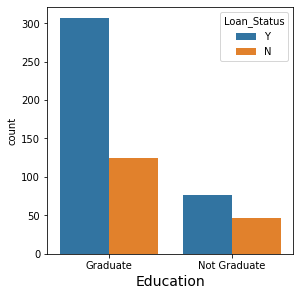

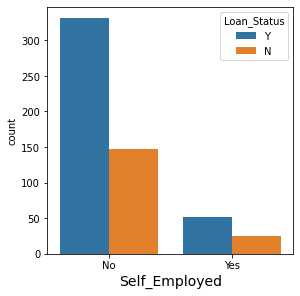

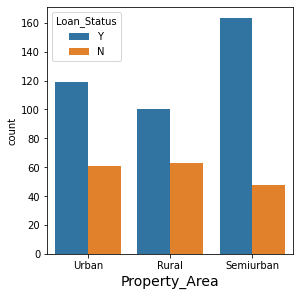

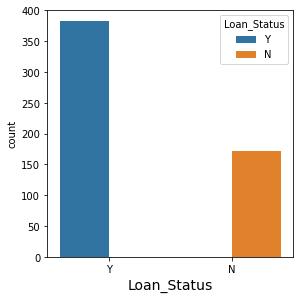

In [23]:
for i in loan_cat[:-1]: 
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data=train)
    plt.xlabel(i, fontsize=14)

In [24]:
from sklearn.preprocessing import LabelEncoder

In [37]:
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for col in cols :
    train[col] = le.fit_transform(train[col])

cols1 = ['Gender','Married','Education','Self_Employed','Property_Area','Dependents']
le = LabelEncoder()
for col in cols1 :
    test[col] = le.fit_transform(test[col])

In [38]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             554 non-null    int64
 1   Married            554 non-null    int64
 2   Dependents         554 non-null    int64
 3   Education          554 non-null    int64
 4   Self_Employed      554 non-null    int64
 5   ApplicantIncome    554 non-null    int64
 6   CoapplicantIncome  554 non-null    int32
 7   LoanAmount         554 non-null    int32
 8   Loan_Amount_Term   554 non-null    int32
 9   Credit_History     554 non-null    int32
 10  Property_Area      554 non-null    int64
 11  Loan_Status        554 non-null    int64
dtypes: int32(4), int64(8)
memory usage: 63.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   

In [39]:
train = train.astype({"CoapplicantIncome":'int', "LoanAmount":'int', 'Loan_Amount_Term':'int', 'Credit_History':'int'}) 
test = test.astype({"LoanAmount":'int', 'Loan_Amount_Term':'int', 'Credit_History':'int'}) 

In [40]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0,146,360,1,2,1
1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,1,1,0,0,1,3000,0,66,360,1,2,1
3,1,1,0,1,0,2583,2358,120,360,1,2,1
4,1,0,0,0,0,6000,0,141,360,1,2,1


In [41]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110,360,1,2
1,1,1,1,0,0,3076,1500,126,360,1,2
2,1,1,2,0,0,5000,1800,208,360,1,2
3,1,1,2,0,0,2340,2546,100,360,0,2
4,1,0,0,1,0,3276,0,78,360,1,2


In [42]:
print(f"training set (row, col): {train.shape}\n\ntesting set (row, col): {test.shape}")

training set (row, col): (554, 12)

testing set (row, col): (324, 11)


In [43]:
features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
y = train['Loan_Status']
X = train[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [66]:
DT = DecisionTreeClassifier(random_state = 0, max_depth = 11)
DT.fit(X_train, y_train)

y_predict = DT.predict(X_test)

test_X = test[features]

test_p = DT.predict(test_X)



print(classification_report(y_test, y_predict))


# Accuracy score
DT_SC = accuracy_score(y_predict,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")
print(DT.tree_.max_depth)

              precision    recall  f1-score   support

           0       0.50      0.58      0.54        48
           1       0.82      0.76      0.79       119

    accuracy                           0.71       167
   macro avg       0.66      0.67      0.66       167
weighted avg       0.73      0.71      0.72       167

71.26% Accurate
11


In [64]:
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
rf_val_predictions = rf_model.predict(X_test)
rf_val_mae = mean_absolute_error(rf_val_predictions, y_test)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 0


In [67]:
RF = RandomForestClassifier(n_estimators = 2000, random_state = 1)
RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)


test_R = RF.predict(test_X)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.62      0.52      0.57        48
           1       0.82      0.87      0.85       119

    accuracy                           0.77       167
   macro avg       0.72      0.70      0.71       167
weighted avg       0.76      0.77      0.77       167

77.25% Accurate


In [61]:
from sklearn.metrics import mean_absolute_error

rf_model = LogisticRegression(random_state=1)
rf_model.fit(X_train, y_train)
rf_val_predictions = rf_model.predict(X_test)
rf_val_mae = mean_absolute_error(rf_val_predictions, y_test)

print("Validation MAE for LG Model: {:,.0f}".format(rf_val_mae))

Validation MAE for LG Model: 0


In [68]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print('accuracy is',accuracy_score(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.69      0.38      0.49        48
           1       0.79      0.93      0.85       119

    accuracy                           0.77       167
   macro avg       0.74      0.65      0.67       167
weighted avg       0.76      0.77      0.75       167

accuracy is 0.7724550898203593


In [72]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
#CountVectorizer objects have a .get_feature_names() method which returns a list of all the unique terms in the corpus.
NB = MultinomialNB()

NB.fit(X_train, y_train)

yp = NB.predict(X_test)

test_NB = NB.predict(test_X)

print(classification_report(y_test, yp))

# Accuracy score
NB_R = accuracy_score(yp, y_test)
print('accuracy is',accuracy_score(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.27      0.31      0.29        48
           1       0.70      0.66      0.68       119

    accuracy                           0.56       167
   macro avg       0.49      0.48      0.48       167
weighted avg       0.58      0.56      0.57       167

accuracy is 0.7724550898203593


In [63]:
score = [DT_SC,RF_SC,LR_SC]
Models = pd.DataFrame({
    'n_neighbors': ["Decision Tree","Random Forest", "Logistic Regression"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,n_neighbors,Score
1,Random Forest,0.772455
2,Logistic Regression,0.772455
0,Decision Tree,0.712575
